# Explorting Kobe the Great [EDA]

![](http://a.espncdn.com/photo/2016/0418/r75275_1600x1000cc.jpg)


This is just a notebook of my exploration of the greatest basketball player of all time (period).

In [1]:
import pandas as pd
import numpy as np

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import plotting libraries
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# style
%matplotlib inline
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100, 'display.float_format', lambda x: '%.3f' % x)
#sns.set(style='white', context='notebook', palette='deep')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

# https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color

# Seven hls color palette (right)
#current_palette_7 = sns.color_palette("hls", 7)
#sns.set_palette(current_palette_7)

# inverted colors: https://encycolorpedia.com/c0d74d
# lakers colors: https://teamcolorcodes.com/los-angeles-lakers-color-codes/

lakers_color = ["#c0d74d",  "#2550ff","#3498db", "#95a5a6", "#e74c3c", "#2ecc71"]
sns.set_palette(lakers_color)

In [2]:
%%html
<div id="data"><p><iframe src="./data/data_dictionary.txt" frameborder="2" height="300"width="97%"></iframe></p></div>

In [9]:
sns.color_palette()

[(0.7529411764705882, 0.8431372549019608, 0.30196078431372547),
 (0.1450980392156863, 0.3137254901960784, 1.0),
 (0.20392156862745098, 0.596078431372549, 0.8588235294117647),
 (0.5843137254901961, 0.6470588235294118, 0.6509803921568628),
 (0.9058823529411765, 0.2980392156862745, 0.23529411764705882),
 (0.1803921568627451, 0.8, 0.44313725490196076)]

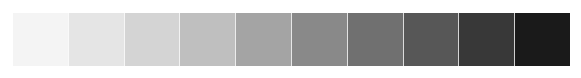

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [10]:
sns.choose_colorbrewer_palette('sequential')

In [3]:
train = pd.read_csv("./data/modelData.csv")
test = pd.read_csv("./data/predData.csv")
train.head()

,recId,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,attendance,arena_temp,avgnoisedb
0,1,Jump Shot,Jump Shot,12,20000012,34.044,-157,0,-118.427,10,1,0,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,36830,LAL @ POR,POR,2,14707,69,94.060
1,4,Driving Dunk Shot,Dunk,155,20000012,34.044,0,0,-118.270,6,2,0,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,36830,LAL @ POR,POR,5,14707,69,94.060
2,5,Jump Shot,Jump Shot,244,20000012,34.055,-145,-11,-118.415,9,3,0,2000-01,32,14,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,36830,LAL @ POR,POR,6,14707,69,94.060
3,6,Layup Shot,Layup,251,20000012,34.044,0,0,-118.270,8,3,0,2000-01,52,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,36830,LAL @ POR,POR,7,14707,69,94.060
4,7,Jump Shot,Jump Shot,265,20000012,33.936,-65,108,-118.335,6,3,0,2000-01,12,12,1,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,36830,LAL @ POR,POR,9,14707,69,94.060


In [4]:
print("Train data: ")
print("Training data Observations (rows): ", train.shape[0])
print("Training data Factors (columns): ", train.shape[1])
print("----------------------------------------------------")
print("Test data: ")
print("Test data Observations (rows): ", test.shape[0])
print("Test data Factors (columns): ", test.shape[1])

Train data: 
Training data Observations (rows):  20697
Training data Factors (columns):  29
----------------------------------------------------
Test data: 
Test data Observations (rows):  5000
Test data Factors (columns):  28


We can see from the above output that the train dataset has one additional column than the test dataset, which is appropriately due to the fact the train dataset has `shot_made_flag` which is the response variable tha is our objective to predict.

__Predict variable ($y$)__ - did Kobe make the shot? (binary 1-make / 0-miss)

### Preliminary Summary Statistics and Data Analysis

In [5]:
print("Kobe Preliminary Summary Statistics (training dataset)")
print("Number of career shots: ", len(train))
print("Average (Mean) Shot Made per Game: ", str("$"), round(train.groupby('game_id')['shot_made_flag'].mean().values.mean(),3))
print("Most Shots Made in a Game: ", train.groupby('game_id')['shot_made_flag'].sum().values.max())
print("Number of game made more than 15 shots: ", sum(train.groupby('game_id')['shot_made_flag'].sum().values > 15))
print("Number of game made less than 5 shots: ", sum(train.groupby('game_id')['shot_made_flag'].sum().values < 5))
print("Variability Shot Make (standard dev): ", round(train.groupby('game_id')['shot_made_flag'].sum().values.std(),3))

Kobe Preliminary Summary Statistics (training dataset)
Number of career shots:  20697
Average (Mean) Shot Made per Game:  $ 0.446
Most Shots Made in a Game:  18
Number of game made more than 15 shots:  6
Number of game made less than 5 shots:  523
Variability Shot Make (standard dev):  3.02


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20697 entries, 0 to 20696
Data columns (total 29 columns):
recId                 20697 non-null int64
action_type           20697 non-null object
combined_shot_type    20697 non-null object
game_event_id         20697 non-null int64
game_id               20697 non-null int64
lat                   20697 non-null float64
loc_x                 20697 non-null int64
loc_y                 20697 non-null int64
lon                   20697 non-null float64
minutes_remaining     20697 non-null int64
period                20697 non-null int64
playoffs              20697 non-null int64
season                20697 non-null object
seconds_remaining     20697 non-null int64
shot_distance         20697 non-null int64
shot_made_flag        20697 non-null int64
shot_type             20697 non-null object
shot_zone_area        20697 non-null object
shot_zone_basic       20697 non-null object
shot_zone_range       20697 non-null object
team_id             

__Data Quality Check__ lets check the columsn that contain `NaN` values.

In [7]:
train.columns[train.isnull().any()].tolist()

[]

combine data sets for EDA

In [8]:
kobe = pd.concat((train, test), axis = 0, ignore_index=True)
print("Combined data: ")
print("Combined data Observations (rows): ", kobe.shape[0])
print("Combined data Factors (columns): ", kobe.shape[1])

Combined data: 
Combined data Observations (rows):  25697
Combined data Factors (columns):  29


## Exploratory Data Analysis

To get started with exploratory analysis, we set out to first review Kobe's distribution of shots made vs shots missed. 

shot_made_flag
0.000    11431
1.000     9266
dtype: int64


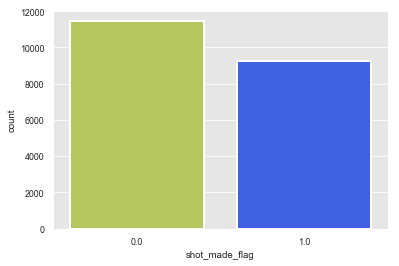

In [9]:
sns.countplot('shot_made_flag',  data=kobe, linewidth=2) #hue='shot_type',
print(kobe.groupby('shot_made_flag').size())
#print(kobe.groupby(['shot_type','shot_made_flag']).size())

Next let see the distirbution of kobe's `shot zone` (where kobe shot the ball on the court) and the number of time he made or missed the shot.

['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Backcourt' 'Right Corner 3' 'Left Corner 3']


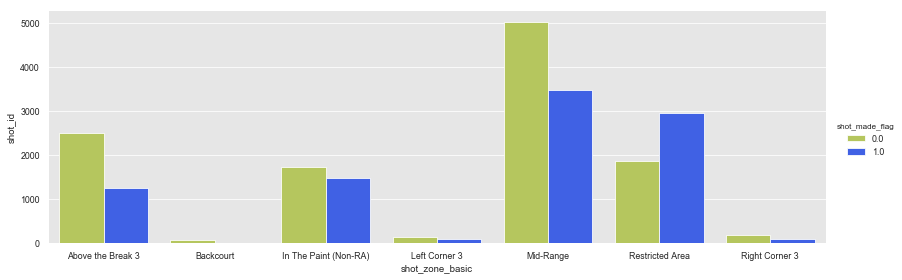

In [10]:
print(kobe.shot_zone_basic.unique())
sns.catplot(x='shot_zone_basic', y='shot_id',
            hue='shot_made_flag', kind='bar', height=4, aspect=11.7/4,
           data=kobe.groupby(['shot_zone_basic','shot_made_flag'])['shot_id'].count().reset_index())

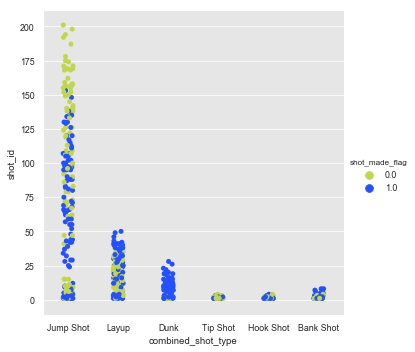

In [11]:
sns.catplot(x='combined_shot_type', y='shot_id', hue='shot_made_flag', data=kobe.groupby(['season','period','combined_shot_type','shot_made_flag'])['shot_id'].count().reset_index())

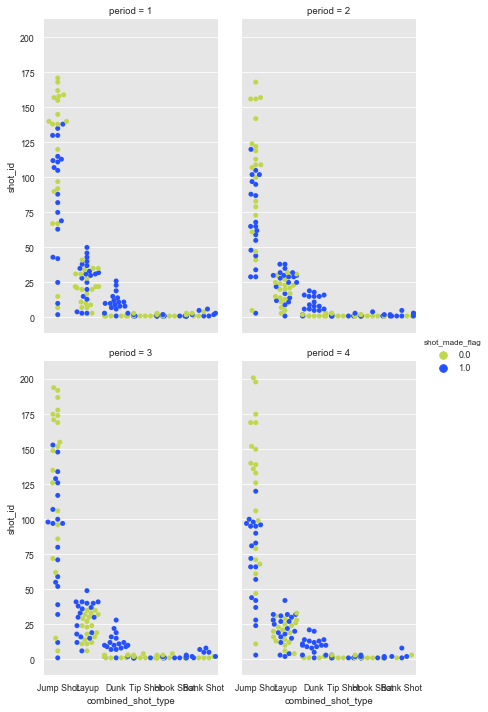

In [12]:
sns.catplot(x="combined_shot_type", y="shot_id", hue="shot_made_flag",
            col="period", aspect=.6,
            kind="swarm",  col_wrap=2, 
            data=kobe[kobe.period <=4].groupby(['season',
                                                'period','combined_shot_type','shot_made_flag'])['shot_id'].count().reset_index())

In [13]:
len(kobe.game_id.unique())

1558

### General Statistics



No handles with labels found to put in legend.


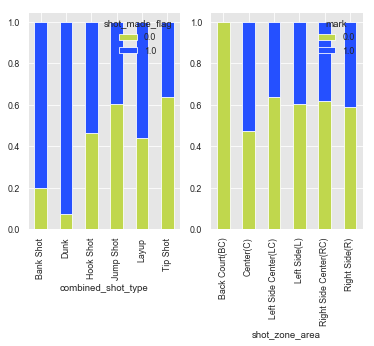

In [22]:

fig, axes3 = plt.subplots(1,2)
table = pd.crosstab(kobe.combined_shot_type, kobe.shot_made_flag)

# https://stackoverflow.com/questions/51977217/getting-empty-plots-when-using-subplots-in-matplotlib
ax = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes3[0])
plt.legend(title='mark', loc=8)

table = pd.crosstab(kobe.shot_zone_area, kobe.shot_made_flag)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes3[1])
plt.legend(title='mark', loc=0)
plt.show()

It appears that `combined_shot_type` can be in the consideration of a predictor variable, especially `Dunks`, `Bank Shots`, which are Kobe's bread and butter. 

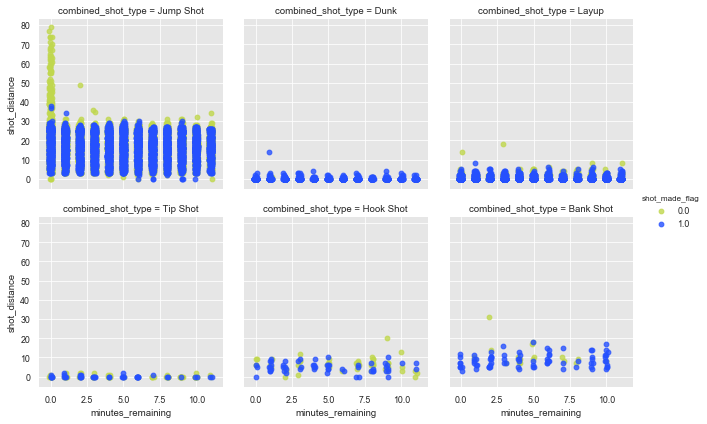

In [14]:
# https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.FacetGrid(kobe, col="combined_shot_type", hue="shot_made_flag",
                  col_wrap=3, margin_titles=True)
g.map(sns.regplot, "minutes_remaining",  "shot_distance", 
      fit_reg=False, x_jitter=.1)
g.add_legend();

The above graph appears that when reviewing the different combinaitons of Kobe's shot type, Kobe's `bread and butter` are contnued to indicate predictor variables for Kobe's made shots for the exeption of `combined_shot_type = Jump Shot` where kobe is pretty consistent in respects to distance, when there is more than 1 min remain in the quarter. 



__Kobe's Shot Zone Area__

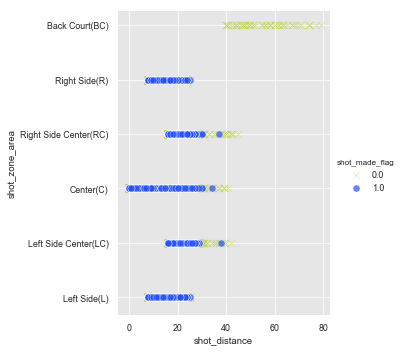

In [15]:
g = sns.FacetGrid(kobe, hue="shot_made_flag", height=5,aspect=1, hue_kws={"marker": ["x", "o"]})
g.map(plt.scatter, "shot_distance", "shot_zone_area", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

In [16]:
kobe[(kobe.shot_zone_area=="Right Side Center(RC)") & (kobe.shot_distance>30) & (kobe.shot_made_flag==1.0)]

,action_type,arena_temp,attendance,avgnoisedb,combined_shot_type,game_date,game_event_id,game_id,lat,loc_x,loc_y,lon,matchup,minutes_remaining,opponent,period,playoffs,recId,season,seconds_remaining,shot_distance,shot_id,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name
2772,Jump Shot,73,15798,95.380,Jump Shot,37653,347,20200676,33.704,166,340,-118.104,LAL vs. UTA,0,UTA,3,0,4113,2002-03,0,37,4114,1.000,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers


Gaining an understanding of Kobe's shot placement on the floor, obviosly, `Back Court (BC)` can be said to be a great predictor for when kobe misses the shot, seemingly enough, it appears Kobe shoot consitantly better in roughly the same range location as his shot moves further away from the center of the court, indicated by the `Right Side (R)` and `Left Side (L)` variables. these will make for good dummy variables, which we will create as `kobe_shot_loc` as:

In [17]:
kobe.loc[(kobe.shot_zone_area!='Back Court(BC)') & (kobe.shot_distance<30), 'kobe_shot_loc'] = 1
kobe.loc[(kobe.kobe_shot_loc!=1), 'kobe_shot_loc'] = 0

### Pearson Correlation

Utilize Perason correlation coefficient to gain a better understanding of the predictor varaibales and their strength in relationship to whether Kobe makes or misses a shot. 

In [29]:
kobe_corr = kobe.corr()
kobe_corr['shot_made_flag'].sort_values(ascending=False)

shot_made_flag       1.000
lat                  0.147
attendance           0.090
kobe_shot_loc        0.067
avgnoisedb           0.051
arena_temp           0.041
minutes_remaining    0.025
seconds_remaining    0.024
loc_x                0.000
lon                  0.000
playoffs            -0.004
game_id             -0.005
recId               -0.015
shot_id             -0.015
game_date           -0.015
period              -0.030
game_event_id       -0.034
loc_y               -0.147
shot_distance       -0.196
team_id                nan
Name: shot_made_flag, dtype: float64

It appears that `shot distance`, `log_y` and `lat` are the top 3 correlatied variables. with `lat` being an interesting because, _im assuming_ this is a measure of the `latitude` of the statium, which mean there is a positive (not strong at all...) correlation with Kobe's shot and more teams that play in more northing located teams...idk about this..

---
## Feature Engineering

The first feature that come that can assist with predicing kobe's shot is to add a feature (or column) to indicate whether he made or missed his last shot. Make sense right... if we can have prior knowedge if Kobe made or missed his last shot, it can reasonable be an indicator as to whether he will make or miss his current/future shot with some range of standard error. Therefore lets create a column that indicate whether he made or miss his last shot. We also need to account for the current shot and last shot were all in the same period of the same game

In [18]:
kobe = kobe.reset_index(drop=True)
fullplays = len(kobe)
#set first prior shot of Kobe's career to 0
kobe.loc[0,'prior_shot_made'] = 0

#set first cum shot of Kobe's career to 0
kobe.loc[0,'cum_shot_made'] = 0

for i in range(1, fullplays):                
    if (kobe.loc[i-1, 'game_id'] == kobe.loc[i, 'game_id']) & (kobe.loc[i-1,'period'] == kobe.loc[i,'period']):
        
        #last shot was a miss
        if (kobe.loc[i-1, 'shot_made_flag'] == 0):
            kobe.loc[i, 'prior_shot_made'] = 0
        else:
            kobe.loc[i, 'prior_shot_made'] = 1

    # reset hot shot after each quarter
    else:
        kobe.loc[i, 'prior_shot_made'] = 0

        
#last shot 2 shots were miss -1 
#test.loc[((test.shot_made_flag == 0) & (test.prior_shot_made == 0)), 'prior_shot_made'] = -1
        
# cumsum made shots
kobe['cum_shot_made'] = (kobe.groupby(['game_id','period'])['shot_made_flag'].cumsum())

Next we will create a unique identifier for each team with an `Opp` suffix. 

In [19]:
kobe['opp'] = kobe.matchup.apply(lambda x: x[-3:])
kobe['oppSeason'] = kobe.matchup.apply(lambda x: x[-3:])+kobe.season

Create variable for home game

In [20]:
kobe['home_game'] = kobe.matchup.apply(lambda x: 0 if "@" in x else 1)

Next an interesting feature would be to get a better timeline of the game, while we have both `minutes_remaining` and `seconds remaining` these would actually be quite arbitrary to the model if we just fed in directly as indicated by the correlation. it would be true that the correlation of time and shots made should be correlated or at least `shot typ`e and time but currently they are broken out in an unuseful format for our model to use effectively. So therefore we will create another timeline to get `secFromGameStart`

In [21]:
# Thanks: https://www.kaggle.com/selfishgene/psychology-of-a-professional-athlete
kobe['secondsFromPeriodEnd'] = 60*kobe['minutes_remaining']+kobe['seconds_remaining']
kobe['secondsFromPeriodStart'] = 60*(11-kobe['minutes_remaining'])+(60-kobe['seconds_remaining'])
kobe['secondsFromGameStart'] = (kobe['period'] <= 4).astype(int)*(kobe['period']-1)*12*60 + (kobe['period'] > 4).astype(int)*((kobe['period']-4)*5*12*60) + kobe['secondsFromPeriodStart']

#### Data From Another Source
Atfer a quick search, found [bakcsetball-reference.com](https://www.basketball-reference.com/players/b/bryanko01.html) that we used their:
* Per Game
* Advanced
* Game won / loss

to assist with addtional information for a better preditive model. 

In [22]:
pergame = pd.read_csv("./data/kobe_per_game_bball_ref.csv")[['Season','FG', 'FGA', 'FG%','3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%','PTS']]
pergame.rename(columns={'Season':'season'}, inplace=True)
kobe = pd.merge(kobe, pergame, on="season", how='left',suffixes=('', '_pg') )
kobe.head()

,action_type,arena_temp,attendance,avgnoisedb,combined_shot_type,game_date,game_event_id,game_id,lat,loc_x,loc_y,lon,matchup,minutes_remaining,opponent,period,playoffs,recId,season,seconds_remaining,shot_distance,shot_id,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,kobe_shot_loc,prior_shot_made,cum_shot_made,opp,oppSeason,home_game,secondsFromPeriodEnd,secondsFromPeriodStart,secondsFromGameStart,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,PTS
0,Jump Shot,69,14707,94.060,Jump Shot,36830,12,20000012,34.044,-157,0,-118.427,LAL @ POR,10,POR,1,0,1,2000-01,22,15,2,0.000,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,622,98,98,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500
1,Driving Dunk Shot,69,14707,94.060,Dunk,36830,155,20000012,34.044,0,0,-118.270,LAL @ POR,6,POR,2,0,4,2000-01,19,0,5,1.000,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1.000,0.000,1.000,POR,POR2000-01,0,379,341,1061,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500
2,Jump Shot,69,14707,94.060,Jump Shot,36830,244,20000012,34.055,-145,-11,-118.415,LAL @ POR,9,POR,3,0,5,2000-01,32,14,6,0.000,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,572,148,1588,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500
3,Layup Shot,69,14707,94.060,Layup,36830,251,20000012,34.044,0,0,-118.270,LAL @ POR,8,POR,3,0,6,2000-01,52,0,7,1.000,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1.000,0.000,1.000,POR,POR2000-01,0,532,188,1628,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500
4,Jump Shot,69,14707,94.060,Jump Shot,36830,265,20000012,33.936,-65,108,-118.335,LAL @ POR,6,POR,3,0,7,2000-01,12,12,9,1.000,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,1.000,1.000,2.000,POR,POR2000-01,0,372,348,1788,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500


In [23]:
adv_bb = pd.read_csv("./data/kobe_advanced_bball_ref.csv")[['Season','PER', 'TS%', '3PAr',
       'FTr','OBPM']]
adv_bb.rename(columns={'Season':'season'}, inplace=True)
kobe = pd.merge(kobe, adv_bb, on="season", how='left',suffixes=('', '_pg') )
kobe.head()

,action_type,arena_temp,attendance,avgnoisedb,combined_shot_type,game_date,game_event_id,game_id,lat,loc_x,loc_y,lon,matchup,minutes_remaining,opponent,period,playoffs,recId,season,seconds_remaining,shot_distance,shot_id,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,kobe_shot_loc,prior_shot_made,cum_shot_made,opp,oppSeason,home_game,secondsFromPeriodEnd,secondsFromPeriodStart,secondsFromGameStart,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,PTS,PER,TS%,3PAr,FTr,OBPM
0,Jump Shot,69,14707,94.060,Jump Shot,36830,12,20000012,34.044,-157,0,-118.427,LAL @ POR,10,POR,1,0,1,2000-01,22,15,2,0.000,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,622,98,98,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300
1,Driving Dunk Shot,69,14707,94.060,Dunk,36830,155,20000012,34.044,0,0,-118.270,LAL @ POR,6,POR,2,0,4,2000-01,19,0,5,1.000,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1.000,0.000,1.000,POR,POR2000-01,0,379,341,1061,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300
2,Jump Shot,69,14707,94.060,Jump Shot,36830,244,20000012,34.055,-145,-11,-118.415,LAL @ POR,9,POR,3,0,5,2000-01,32,14,6,0.000,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,572,148,1588,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300
3,Layup Shot,69,14707,94.060,Layup,36830,251,20000012,34.044,0,0,-118.270,LAL @ POR,8,POR,3,0,6,2000-01,52,0,7,1.000,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1.000,0.000,1.000,POR,POR2000-01,0,532,188,1628,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300
4,Jump Shot,69,14707,94.060,Jump Shot,36830,265,20000012,33.936,-65,108,-118.335,LAL @ POR,6,POR,3,0,7,2000-01,12,12,9,1.000,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,1.000,1.000,2.000,POR,POR2000-01,0,372,348,1788,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300


add career rating stats
I had to add 500 rating when kobe was not rated
https://stats.nba.com/player/977/career/

In [24]:
rating = pd.read_csv("./data/career_ratings.csv")
kobe = pd.merge(kobe, rating, on="season", how='left')
kobe.head()

,action_type,arena_temp,attendance,avgnoisedb,combined_shot_type,game_date,game_event_id,game_id,lat,loc_x,loc_y,lon,matchup,minutes_remaining,opponent,period,playoffs,recId,season,seconds_remaining,shot_distance,shot_id,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,kobe_shot_loc,prior_shot_made,cum_shot_made,opp,oppSeason,home_game,secondsFromPeriodEnd,secondsFromPeriodStart,secondsFromGameStart,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,PTS,PER,TS%,3PAr,FTr,OBPM,PTS_rating,FGM_rating,FGA_rating,FG%_rating,3PM_rating,3PA_rating,3P%_rating
0,Jump Shot,69,14707,94.060,Jump Shot,36830,12,20000012,34.044,-157,0,-118.427,LAL @ POR,10,POR,1,0,1,2000-01,22,15,2,0.000,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,622,98,98,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300,4,4,5,37,55,50,81
1,Driving Dunk Shot,69,14707,94.060,Dunk,36830,155,20000012,34.044,0,0,-118.270,LAL @ POR,6,POR,2,0,4,2000-01,19,0,5,1.000,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1.000,0.000,1.000,POR,POR2000-01,0,379,341,1061,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300,4,4,5,37,55,50,81
2,Jump Shot,69,14707,94.060,Jump Shot,36830,244,20000012,34.055,-145,-11,-118.415,LAL @ POR,9,POR,3,0,5,2000-01,32,14,6,0.000,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,572,148,1588,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300,4,4,5,37,55,50,81
3,Layup Shot,69,14707,94.060,Layup,36830,251,20000012,34.044,0,0,-118.270,LAL @ POR,8,POR,3,0,6,2000-01,52,0,7,1.000,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1.000,0.000,1.000,POR,POR2000-01,0,532,188,1628,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300,4,4,5,37,55,50,81
4,Jump Shot,69,14707,94.060,Jump Shot,36830,265,20000012,33.936,-65,108,-118.335,LAL @ POR,6,POR,3,0,7,2000-01,12,12,9,1.000,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,1.000,1.000,2.000,POR,POR2000-01,0,372,348,1788,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300,4,4,5,37,55,50,81


creating another variable to indicate whether Lakers won the game or not

In [25]:
wl = pd.read_csv("./data/kobe_win_loss.csv")
kobe = pd.merge(kobe, wl, on="game_date", how="left")

In [27]:
kobe.head()

,action_type,arena_temp,attendance,avgnoisedb,combined_shot_type,game_date,game_event_id,game_id,lat,loc_x,loc_y,lon,matchup,minutes_remaining,opponent,period,playoffs,recId,season,seconds_remaining,shot_distance,shot_id,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,kobe_shot_loc,prior_shot_made,cum_shot_made,opp,oppSeason,home_game,secondsFromPeriodEnd,secondsFromPeriodStart,secondsFromGameStart,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,PTS,PER,TS%,3PAr,FTr,OBPM,PTS_rating,FGM_rating,FGA_rating,FG%_rating,3PM_rating,3PA_rating,3P%_rating,WL,game_won,score_ratio,OppSeason,OppDefRank,OppDef_Rating,Conf,Div,Same_Conf,Same_Div,Opp_margin_of_victory,LAL_Season,LA_mov,LA_offRating,net_la_v_oppd_rating
0,Jump Shot,69,14707,94.060,Jump Shot,36830,12,20000012,34.044,-157,0,-118.427,LAL @ POR,10,POR,1,0,1,2000-01,22,15,2,0.000,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,622,98,98,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300,4,4,5,37,55,50,81,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120
1,Driving Dunk Shot,69,14707,94.060,Dunk,36830,155,20000012,34.044,0,0,-118.270,LAL @ POR,6,POR,2,0,4,2000-01,19,0,5,1.000,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1.000,0.000,1.000,POR,POR2000-01,0,379,341,1061,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300,4,4,5,37,55,50,81,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120
2,Jump Shot,69,14707,94.060,Jump Shot,36830,244,20000012,34.055,-145,-11,-118.415,LAL @ POR,9,POR,3,0,5,2000-01,32,14,6,0.000,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,572,148,1588,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300,4,4,5,37,55,50,81,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120
3,Layup Shot,69,14707,94.060,Layup,36830,251,20000012,34.044,0,0,-118.270,LAL @ POR,8,POR,3,0,6,2000-01,52,0,7,1.000,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1.000,0.000,1.000,POR,POR2000-01,0,532,188,1628,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300,4,4,5,37,55,50,81,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120
4,Jump Shot,69,14707,94.060,Jump Shot,36830,265,20000012,33.936,-65,108,-118.335,LAL @ POR,6,POR,3,0,7,2000-01,12,12,9,1.000,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,1.000,1.000,2.000,POR,POR2000-01,0,372,348,1788,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300,4,4,5,37,55,50,81,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120


create variable whether kobe had a 10 rating in the NBA or not.

In [28]:
kobe['top_rated'] = kobe.PTS_rating.apply(lambda x: 1 if x<20 else 0)

Create a hothand function to group kobe shots based on the number consecutive shots

In [29]:
def hothand(y):
    if y  > 4:
        return 'fire'
    elif y == 3:
        return 'hot hand'
    elif y == 2:
        return 'heat'
    elif y >= 0:
        return 'avg'
    elif y < 0:
        return 'cold'
kobe['hot_hand'] = [hothand(k) for k in kobe.cum_shot_made.values]

Lets see the distribution of the hothand function on Kobe.

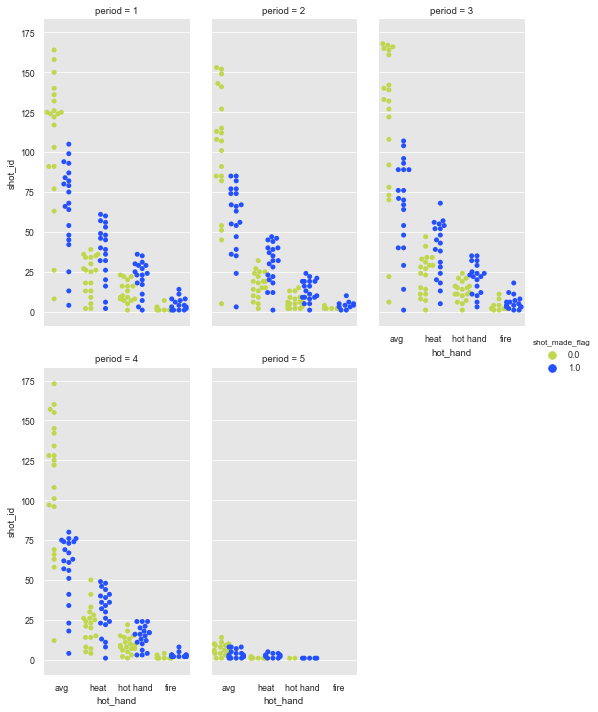

In [30]:
g= sns.catplot(x="hot_hand", y="shot_id", hue="shot_made_flag",
            col="period", aspect=.5,
            kind="swarm", col_wrap=3, dodge=True,
            data=kobe[kobe.period <=5].groupby(['season','period','hot_hand','shot_made_flag'])['shot_id'].count().reset_index())

Lets create a feature to keep track of Kobe's current points. Perhaps the more points Kobe has the higher likelihood we can predict whether his next shot will go in.

2 Pts and 3Pts now we convert each make and miss to a score and then we cumulatively sum it for a running average.

In [31]:
kobe.loc[(kobe['shot_made_flag']==1) & (kobe['shot_type']=='2PT Field Goal'),'pts'] = 2
kobe.loc[(kobe['shot_made_flag']==1) & (kobe['shot_type']=='3PT Field Goal'),'pts'] = 3
kobe.loc[kobe['shot_made_flag']==0,'pts'] = 0
kobe['pts'] = (kobe.groupby(['game_id','period'])['pts'].cumsum())

Next lets create a field goal percentage

Formula Field goal percentage (FG%) calculates as:

![](https://s0.wp.com/latex.php?latex=%5Cfrac%7B%5Ctext%7BField+Goals%7D%7D%7B%5Ctext%7BField+Goal+Attempts%7D%7D&bg=ffffff&fg=000&s=0)

In [32]:
# 2 Pointers
kobe.loc[kobe['shot_type']=='2PT Field Goal','field_goal_attempts'] = 1
kobe.loc[kobe['shot_type']=='3PT Field Goal','field_goal_attempts'] = 0
kobe.loc[(kobe['shot_made_flag']==1) & (kobe['shot_type']=='2PT Field Goal'),'field_goal'] = 1
kobe.loc[kobe['field_goal'].isnull(),'field_goal'] = 0
kobe['field_goal_attempts'] = (kobe.groupby(['game_id'])['field_goal_attempts'].cumsum())
kobe['field_goal'] = (kobe.groupby(['game_id'])['field_goal'].cumsum())
kobe['fg_pct'] = kobe.field_goal / kobe.field_goal_attempts
kobe.loc[kobe['fg_pct'].isnull(),'fg_pct'] = 0


# 3 Pointers
kobe.loc[kobe['shot_type']=='3PT Field Goal','three_pt_attempts'] = 1
kobe.loc[kobe['shot_type']=='2PT Field Goal','three_pt_attempts'] = 0
kobe.loc[(kobe['shot_made_flag']==1) & (kobe['shot_type']=='3PT Field Goal'),'three_pt'] = 1
kobe.loc[kobe['three_pt'].isnull(),'three_pt'] = 0
kobe['three_pt_attempts'] = (kobe.groupby(['game_id'])['three_pt_attempts'].cumsum())
kobe['three_pt'] = (kobe.groupby(['game_id'])['three_pt'].cumsum())
kobe['three_pct'] = kobe.three_pt / kobe.three_pt_attempts
kobe.loc[kobe['three_pct'].isnull(),'three_pct'] = 0

Below is Kobe's fg_pct field goal percentage that is aggregated by season and by quarter. The x axis is the fg_pct the further to the right the more accuract (or higher) Kobe's 2PT Field Goal were. The y axis shows the number of points scored for that quarter.

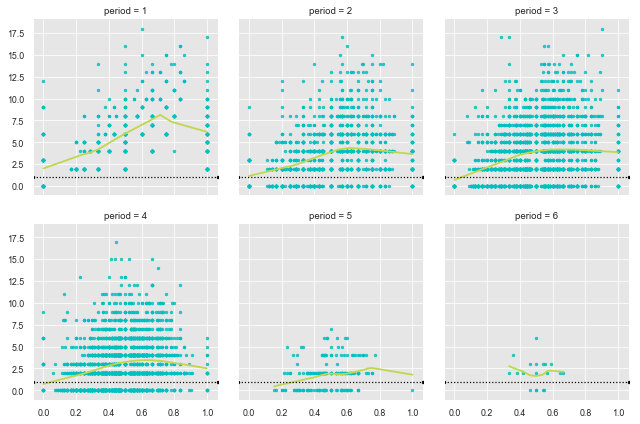

In [33]:
g = sns.lmplot('fg_pct', 'pts', col='period', data=kobe[kobe.period <=6].groupby(['season','period','pts','fg_pct'])['shot_id'].count().reset_index(),
               markers=".", scatter_kws=dict(color='c'),
              col_wrap=3, height=3, lowess=True)
g.map(plt.axhline, y=1, color="k", ls=":");

In [34]:
kobe.columns.unique()

Index(['action_type', 'arena_temp', 'attendance', 'avgnoisedb',
       'combined_shot_type', 'game_date', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'matchup', 'minutes_remaining', 'opponent',
       'period', 'playoffs', 'recId', 'season', 'seconds_remaining',
       'shot_distance', 'shot_id', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_id',
       'team_name', 'kobe_shot_loc', 'prior_shot_made', 'cum_shot_made', 'opp',
       'oppSeason', 'home_game', 'secondsFromPeriodEnd',
       'secondsFromPeriodStart', 'secondsFromGameStart', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'OBPM', 'PTS_rating', 'FGM_rating',
       'FGA_rating', 'FG%_rating', '3PM_rating', '3PA_rating', '3P%_rating',
       'WL', 'game_won', 'score_ratio', 'OppSeason', 'OppDefRank',
       'OppDef_Rating', 'Conf', 'Div', 'Same_Conf', 'Same_Div'

In [71]:
kobe.head(1)

,action_type,arena_temp,attendance,avgnoisedb,combined_shot_type,game_date,game_event_id,game_id,lat,loc_x,loc_y,lon,matchup,minutes_remaining,opponent,period,playoffs,recId,season,seconds_remaining,shot_distance,shot_id,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,kobe_shot_loc,prior_shot_made,cum_shot_made,opp,oppSeason,home_game,secondsFromPeriodEnd,secondsFromPeriodStart,secondsFromGameStart,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,...,LA_mov_y,LA_offRating_y,net_la_v_oppd_rating_y,FG_pg,FGA_pg,FG%_pg,3P_pg,3PA_pg,3P%_pg,2P_pg,2PA_pg,2P%_pg,eFG%_pg,FT_pg,FTA_pg,FT%_pg,PTS_pg,PER_pg,TS%_pg,3PAr_pg,FTr_pg,OBPM_pg,PTS_rating,FGM_rating,FGA_rating,FG%_rating,3PM_rating,3PA_rating,3P%_rating,WL,game_won,score_ratio,OppSeason,OppDefRank,OppDef_Rating,Conf,Div,Same_Conf,Same_Div,Opp_margin_of_victory,LAL_Season,LA_mov,LA_offRating,net_la_v_oppd_rating,field_goal_attempts,field_goal,fg_pct,three_pt_attempts,three_pt,three_pct
0,Jump Shot,69,14707,94.060,Jump Shot,36830,12,20000012,34.044,-157,0,-118.427,LAL @ POR,10,POR,1,0,1,2000-01,22,15,2,0.000,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,622,98,98,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,...,3.380,109.330,7.120,10.300,22.200,0.464,0.900,2.900,0.305,9.400,19.300,0.489,0.484,7.000,8.200,0.853,28.500,24.500,0.552,0.132,0.369,5.300,4,4,5,37,55,50,81,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120,1.000,0.000,0.000,0.000,0.000,0.000


##### Encodings

We will start by iniializing 3 label encoders, below are the labels and the current unique categories.

* shot_zone_range: '8-16 ft.', '16-24 ft.', 'Less Than 8 ft.', '24+ ft.','Back Court Shot'
* shot_type : '2PT Field Goal', '3PT Field Goal'
* shot_zone_basic: 'Mid-Range', 'Restricted Area', 'In The Paint (Non-RA)','Above the Break 3', 'Right Corner 3', 'Backcourt', 'Left Corner 3'

In [36]:
from sklearn.preprocessing import LabelEncoder

le_shot_zone_range = LabelEncoder()
le_shot_type = LabelEncoder()
le_shot_zone_basic = LabelEncoder()

kobe['range_encoded'] = le_shot_zone_range.fit_transform(kobe.shot_zone_range)
kobe['type_encoded'] = le_shot_type.fit_transform(kobe.shot_type)
kobe['basic_encoded'] = le_shot_zone_basic.fit_transform(kobe.shot_zone_basic)

['8-16 ft.' 'Less Than 8 ft.' '24+ ft.' '16-24 ft.' 'Back Court Shot']


Text(0.5, 1.0, 'Kobe period_ Distribution on Shots Made/Missed')

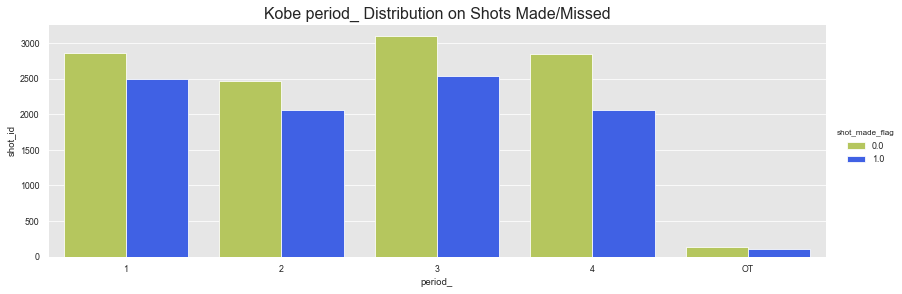

In [38]:
kobe['period_'] = kobe.period
kobe.loc[kobe.period_>4, "period_"] = "OT"
print(kobe.shot_zone_range.unique())
sns.catplot(x='period_', y='shot_id',
            hue='shot_made_flag', kind='bar', height=4, aspect=11.7/4,
           data=kobe.groupby(['period_','shot_made_flag'])['shot_id'].count().reset_index())
plt.title("Kobe period_ Distribution on Shots Made/Missed", fontsize=16)


In [39]:
# save file
kobe.to_csv("./data/kobe_data2.csv")

### Correlation Analysis

In [40]:
# df_train comes form the 'flag = train' flag in the dataset.
train_corr = kobe[~kobe.shot_made_flag.isnull()].corr()
#kobe_corr['shot_made_flag'].sort_values(ascending=False)

train_correlation_target = abs(train_corr.shot_made_flag)
corr_matrix = train_correlation_target[train_correlation_target>0.05]
potentialFeatures=list(corr_matrix)

In [41]:
train_correlation_target

arena_temp               0.041
attendance               0.090
avgnoisedb               0.051
game_date                0.015
game_event_id            0.034
game_id                  0.005
lat                      0.147
loc_x                    0.000
loc_y                    0.147
lon                      0.000
minutes_remaining        0.025
period                   0.030
playoffs                 0.004
recId                    0.015
seconds_remaining        0.024
shot_distance            0.196
shot_id                  0.015
shot_made_flag           1.000
team_id                    nan
kobe_shot_loc            0.067
prior_shot_made          0.003
cum_shot_made            0.403
home_game                0.023
secondsFromPeriodEnd     0.027
secondsFromPeriodStart   0.027
secondsFromGameStart     0.032
FG                       0.023
FGA                      0.012
FG%                      0.043
3P                       0.006
                          ... 
FTr                      0.014
OBPM    

In [42]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20,12)
    plt.ylabel(y_label)
    
    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

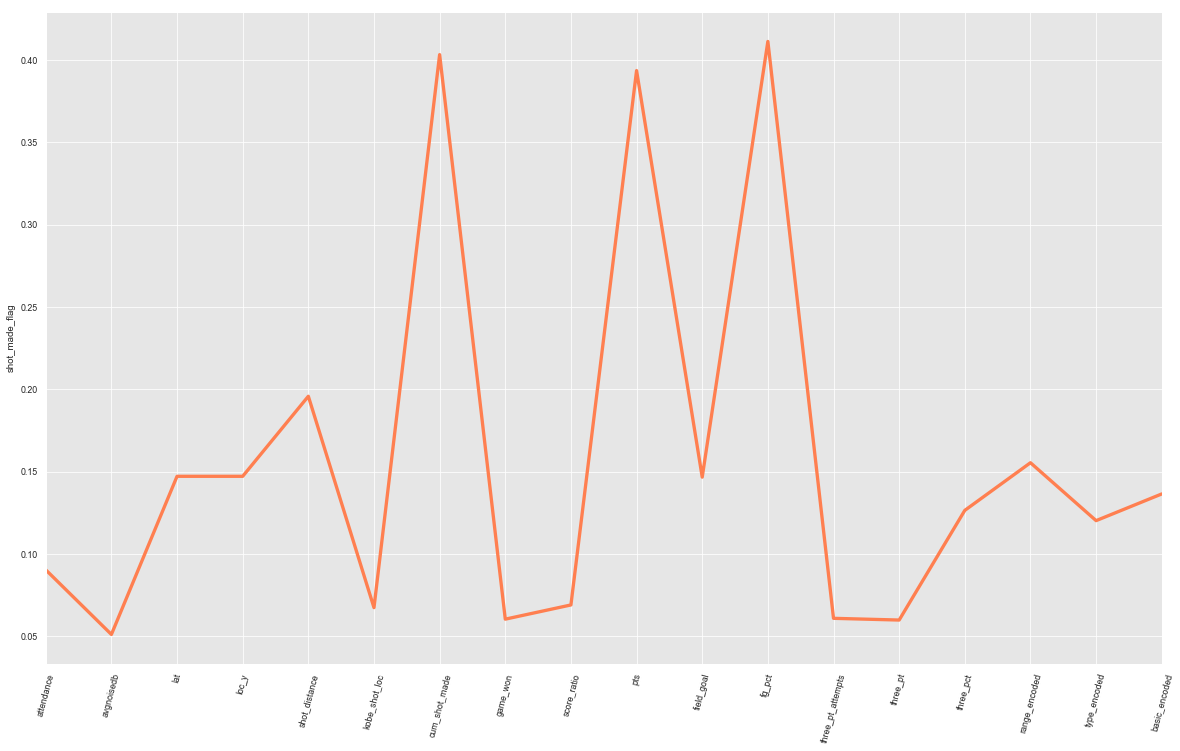

,attributes,correlation
11,fg_pct,0.411
6,cum_shot_made,0.403
9,pts,0.393
4,shot_distance,0.196
15,range_encoded,0.155
3,loc_y,0.147
2,lat,0.147
10,field_goal,0.147
17,basic_encoded,0.136
14,three_pct,0.127


In [43]:
# create a dataframe suing cols and correlations
corr_matrix_ = corr_matrix[~corr_matrix.index.isin(['shot_made_flag'])]

df5 = pd.DataFrame({'attributes': corr_matrix_.index, 'correlation': corr_matrix_.values})

# lets plot above dataframe using the function we created

plot_dataframe(df5, 'shot_made_flag')
df5.sort_values('correlation',ascending=False)

As we can see, from the highly correlated features from above, there are only 3 new variables htat are above .1 which are `fg_pct`, `cum_shot_made` and `pts`

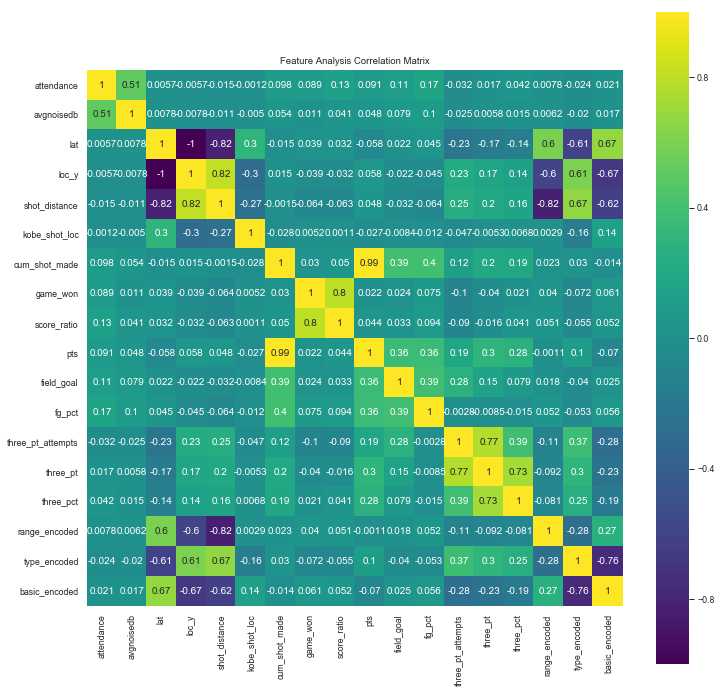

In [44]:

corr_matrix = kobe[~kobe.shot_made_flag.isnull()][list(corr_matrix_.index)].corr()

plt.figure(figsize=(12,12))
ax= plt.axes()
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='viridis', ax=ax)
ax.set_title('Feature Analysis Correlation Matrix')
plt.show()

#### Multicoliniarity

VIF

In [45]:
#https://etav.github.io/python/vif_factor_python.html
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corr_matrix.values, i) for i in range(corr_matrix.shape[1])]
vif["features"] = corr_matrix.columns
print("Variance Inflation Factor for Heatmap Predictors")
vif.round(1)

Variance Inflation Factor for Heatmap Predictors


,VIF Factor,features
0,2.700,attendance
1,2.600,avgnoisedb
2,inf,lat
3,inf,loc_y
4,2248.300,shot_distance
5,22.500,kobe_shot_loc
6,15251.500,cum_shot_made
7,18.700,game_won
8,18.500,score_ratio
9,15516.100,pts


In [46]:
corr_matrix

,attendance,avgnoisedb,lat,loc_y,shot_distance,kobe_shot_loc,cum_shot_made,game_won,score_ratio,pts,field_goal,fg_pct,three_pt_attempts,three_pt,three_pct,range_encoded,type_encoded,basic_encoded
attendance,1.000,0.513,0.006,-0.006,-0.015,-0.001,0.098,0.089,0.128,0.091,0.113,0.171,-0.032,0.017,0.042,0.008,-0.024,0.021
avgnoisedb,0.513,1.000,0.008,-0.008,-0.011,-0.005,0.054,0.011,0.041,0.048,0.079,0.100,-0.025,0.006,0.015,0.006,-0.020,0.017
lat,0.006,0.008,1.000,-1.000,-0.818,0.304,-0.015,0.039,0.032,-0.058,0.022,0.045,-0.226,-0.173,-0.142,0.599,-0.606,0.674
loc_y,-0.006,-0.008,-1.000,1.000,0.818,-0.304,0.015,-0.039,-0.032,0.058,-0.022,-0.045,0.226,0.173,0.142,-0.599,0.606,-0.674
shot_distance,-0.015,-0.011,-0.818,0.818,1.000,-0.265,-0.002,-0.064,-0.063,0.048,-0.032,-0.064,0.249,0.196,0.164,-0.825,0.667,-0.618
kobe_shot_loc,-0.001,-0.005,0.304,-0.304,-0.265,1.000,-0.028,0.005,0.001,-0.027,-0.008,-0.012,-0.047,-0.005,0.007,0.003,-0.163,0.135
cum_shot_made,0.098,0.054,-0.015,0.015,-0.002,-0.028,1.000,0.030,0.050,0.985,0.392,0.398,0.120,0.202,0.189,0.023,0.030,-0.014
game_won,0.089,0.011,0.039,-0.039,-0.064,0.005,0.030,1.000,0.798,0.022,0.024,0.075,-0.100,-0.040,0.021,0.040,-0.072,0.061
score_ratio,0.128,0.041,0.032,-0.032,-0.063,0.001,0.050,0.798,1.000,0.044,0.033,0.094,-0.090,-0.016,0.041,0.051,-0.055,0.052
pts,0.091,0.048,-0.058,0.058,0.048,-0.027,0.985,0.022,0.044,1.000,0.361,0.360,0.187,0.299,0.278,-0.001,0.103,-0.070


In [47]:

potentialFeatures = [
 'shot_distance', 'game_won',
 'cum_shot_made','score_ratio',
 'pts','kobe_shot_loc',
 'field_goal',
 'fg_pct','attendance',
 'three_pct',
 'range_encoded', 'top_rated',
'prior_shot_made']


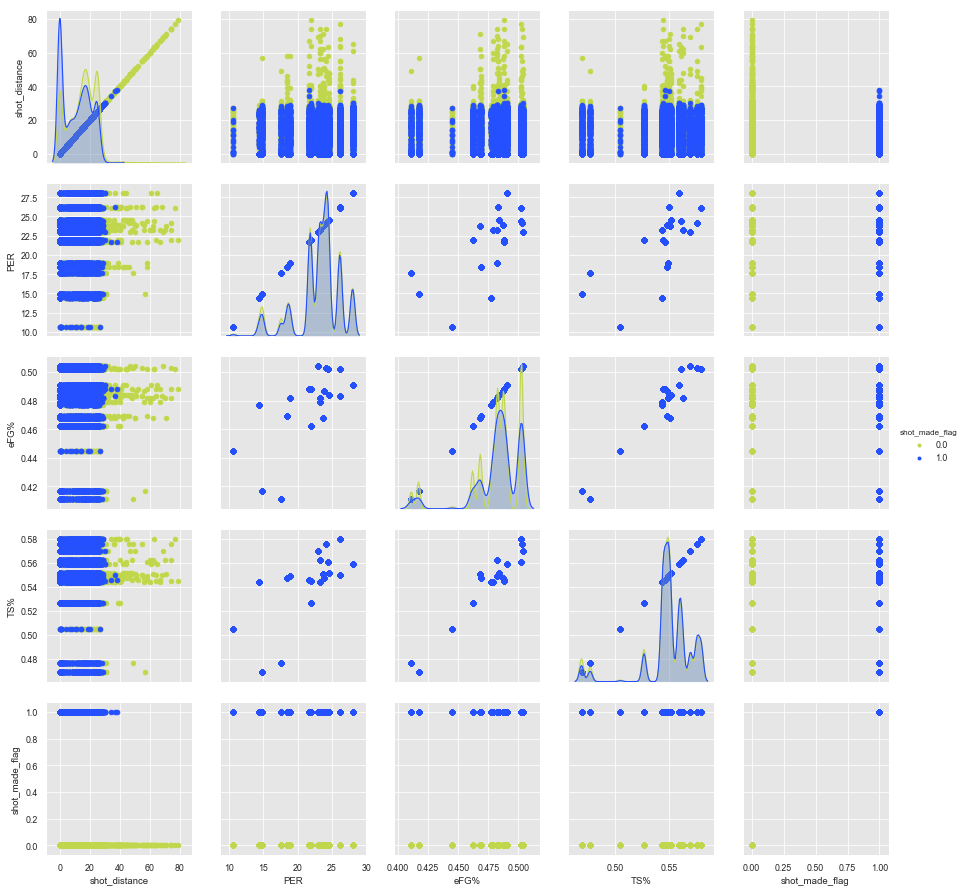

In [48]:
g = sns.pairplot(kobe[['shot_distance','PER','eFG%','TS%','shot_made_flag']], hue='shot_made_flag',
                diag_kind="kde", height=2.5, )
g.map(plt.scatter);

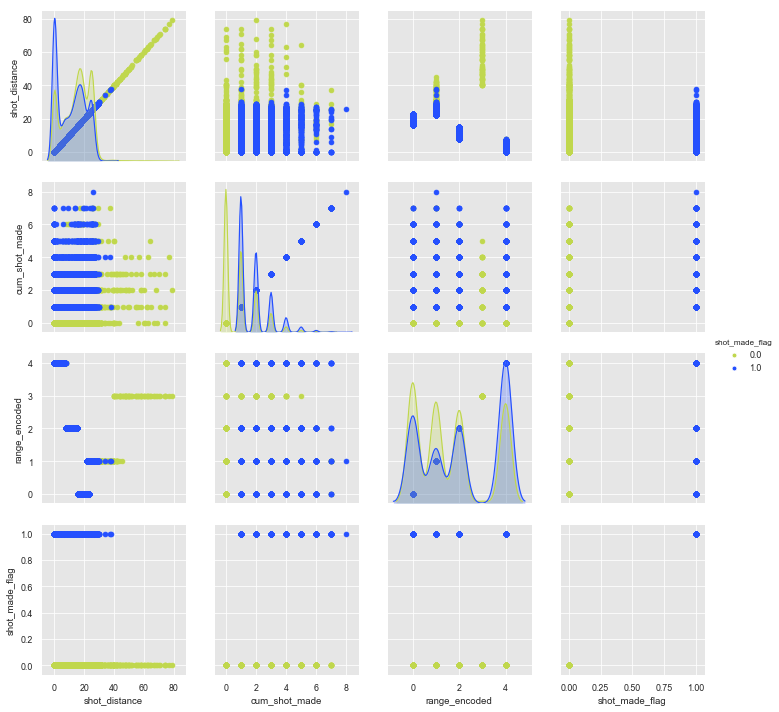

In [49]:
g = sns.pairplot(kobe[['shot_distance','cum_shot_made','range_encoded','shot_made_flag']], hue='shot_made_flag',
                diag_kind="kde", height=2.5, )
g.map(plt.scatter);